In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from scipy.sparse import hstack
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [23]:
df = pd.read_csv("../../data/processed/dataset.csv")

In [24]:
categorical_cols = ['Restaurant_location', 'Restaurant_categories_name']
numerical_cols = ['Restaurant_minimum_order', 'Restaurant_additional_service_charge', 'Restaurant_categories_food_item_price']
text_cols = ['Restaurant_categories_food_item_ingredient']

In [30]:
scalar = StandardScaler()
data_scaled = scalar.fit_transform(df[numerical_cols])

In [33]:
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_encoded=encoder.fit_transform(df[categorical_cols])

In [31]:
vectorizer = TfidfVectorizer(max_features=100)
text_transformed = vectorizer.fit_transform(df[text_cols].astype(str).values.ravel())

In [34]:
final_features = hstack([data_scaled, categorical_encoded, text_transformed])

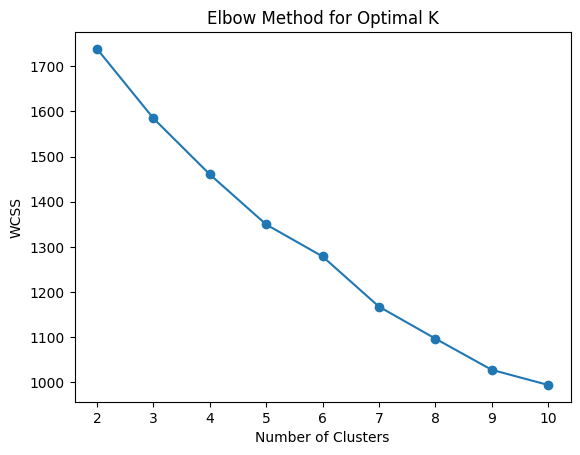

In [37]:
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_features)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [38]:
best_k = None
best_score = -1
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(final_features)
    score = silhouette_score(final_features, labels)
    print(f'Clusters: {k}, Silhouette Score: {score}')
    if score > best_score:
        best_k, best_score = k, score

print(f'Optimal Number of Clusters: {best_k}')

Clusters: 2, Silhouette Score: 0.20363697996222138
Clusters: 3, Silhouette Score: 0.14302522836496576
Clusters: 4, Silhouette Score: 0.149389309534307
Clusters: 5, Silhouette Score: 0.16470441537756508
Clusters: 6, Silhouette Score: 0.182254633132684
Clusters: 7, Silhouette Score: 0.22342819562101862
Clusters: 8, Silhouette Score: 0.22981972158130795
Clusters: 9, Silhouette Score: 0.2356587483646122
Clusters: 10, Silhouette Score: 0.2324762621449632
Optimal Number of Clusters: 9


In [40]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(final_features)

In [42]:
df.to_csv('clustered_restaurant_data.csv', index=False)
print("Clustering completed! Check clustered_restaurant_data.csv")

Clustering completed! Check clustered_restaurant_data.csv
